In [ ]:
# load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image

# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path, verbose=False)

# inference
image_path = "./../../../data/Driver Drowsiness Dataset (DDD)/Augmentation/Drowsy/20241108_140133.png"
img = Image.open(image_path)


/home/sangbeom/venv/adas/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



0: 480x640 2 FACEs, 50.1ms
Speed: 7.8ms preprocess, 50.1ms inference, 670.0ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
output = model(np.array(img), verbose=False)

results = Detections.from_ultralytics(output[0])


In [2]:
output

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'FACE'}
 obb: None
 orig_img: array([[[214, 228, 228],
         [203, 217, 217],
         [202, 216, 216],
         ...,
         [238, 249, 250],
         [240, 246, 248],
         [238, 245, 247]],
 
        [[227, 241, 238],
         [219, 233, 230],
         [214, 228, 228],
         ...,
         [236, 248, 246],
         [236, 248, 246],
         [235, 247, 245]],
 
        [[233, 246, 246],
         [230, 244, 244],
         [227, 238, 239],
         ...,
         [238, 249, 248],
         [238, 249, 248],
         [236, 248, 246]],
 
        ...,
 
        [[152, 155, 163],
         [150, 154, 162],
         [152, 152, 157],
         ...,
         [ 73,  61,  65],
         [ 74,  71,  72],
         [ 74,  71,  72]],
 
        [[155, 154, 159],
         [155, 154, 159],
         [151, 151, 155],
         ...,
         [ 75,  65, 

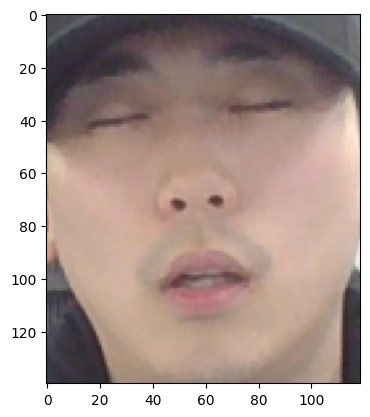

In [4]:

box = results

x1, y1, x2, y2 = results.xyxy[0].astype(int)

# x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
img = np.array(img)
# img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
img = img[y1:y2, x1:x2]
plt.imshow(img)